In [3]:
import cv2 as cv

path = '/workspaces/projet_bees_detection_basile/data_bees_detection/benchmark_classification/23_05_VGG16_dense_2/train/Apis mellifera/whole_dataset_cropped_iNaturalist_inaturalist_5_Apis mellifera75746.jpeg'

img = cv.imread(path)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

In [5]:
img.shape

(187, 295, 3)

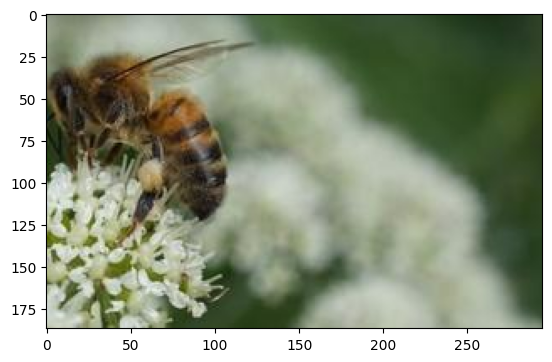

In [4]:
import matplotlib.pyplot as plt

# show image
plt.imshow(img)

(224, 224, 3)


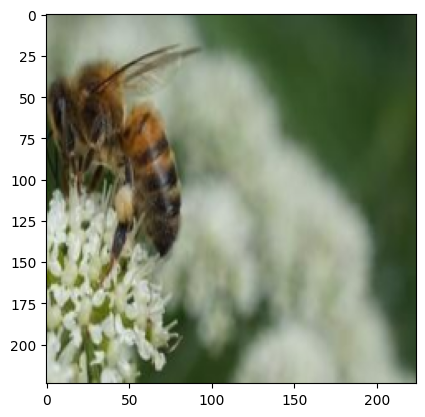

In [7]:
img_reshaped = cv.resize(img, (224, 224))

print(img_reshaped.shape)

plt.imshow(img_reshaped)



In [9]:
def color_preprocessing(x):
    x = x.astype('float32')
    mean = [125.3, 123.0, 113.9]
    std  = [63.0,  62.1,  66.7]
    for i in range(3):
        x[:,:,i] = (x[:,:,i] - mean[i]) / std[i]
    return x

img_reshaped = color_preprocessing(img_reshaped)

In [10]:
img_reshaped.shape

(224, 224, 3)

In [11]:
mean, std ,min ,max = img_reshaped.mean(), img_reshaped.std(), img_reshaped.min(), img_reshaped.max()

print(mean, std ,min ,max)


-0.039345443 0.8650888 -1.8777778 1.9323672


In [12]:
img.mean(axis=(0,1))

array([120.0619777 , 130.65721019, 103.68702982])

In [ ]:
def reshape_img 

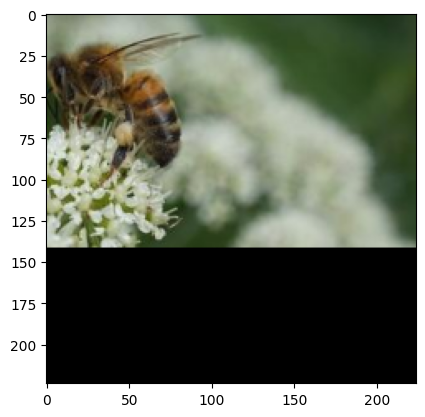

In [14]:
def _resize_img(img, image_size):
    

        shape = img.shape

        # cas 1 : both dimensions are too small
        if shape[0] < image_size and shape[1] < image_size:

            # add padding
            img = cv.copyMakeBorder(img, 0, image_size - shape[0], 0, image_size - shape[1], cv.BORDER_CONSTANT, value=0)
        
        # cas 2 : every other case
        else:

            # add padding to the smallest dimension to make it equal to the biggest one
            if shape[0] < shape[1]:
                img = cv.copyMakeBorder(img, 0, shape[1] - shape[0], 0, 0, cv.BORDER_CONSTANT, value=0)
            else:
                img = cv.copyMakeBorder(img, 0, 0, 0, shape[0] - shape[1], cv.BORDER_CONSTANT, value=0)
                                        
            # resize    
            img = cv.resize(img,(image_size,image_size))

        return img

img = _resize_img(img, 224)

plt.imshow(img)